<a href="https://colab.research.google.com/github/dhruvchakervarti/My-finance-codes-practice/blob/master/MACD_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# MACD Strategy 
import pandas as pd
import numpy as np 
from datetime import datetime 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas_datareader import data as web

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [5]:
stockStartDate = '2017-04-20'
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-08-07'

In [8]:
df = web.DataReader('AAPL',data_source='yahoo',start=stockStartDate,end=today)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-20,142.919998,141.160004,141.220001,142.440002,23319600.0,135.966064
2017-04-21,142.679993,141.850006,142.440002,142.270004,17320900.0,135.803802
2017-04-24,143.949997,143.179993,143.500000,143.639999,17134300.0,137.111542
2017-04-25,144.899994,143.869995,143.910004,144.529999,18871500.0,137.961105
2017-04-26,144.600006,143.380005,144.470001,143.679993,20041200.0,137.149704
...,...,...,...,...,...,...
2020-07-31,425.660004,403.299988,411.540009,425.040009,93584200.0,425.040009
2020-08-03,446.549988,431.570007,432.799988,435.750000,77037800.0,435.750000
2020-08-04,443.160004,433.549988,436.529999,438.660004,43267900.0,438.660004


In [12]:
# Set date as index
#df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#df

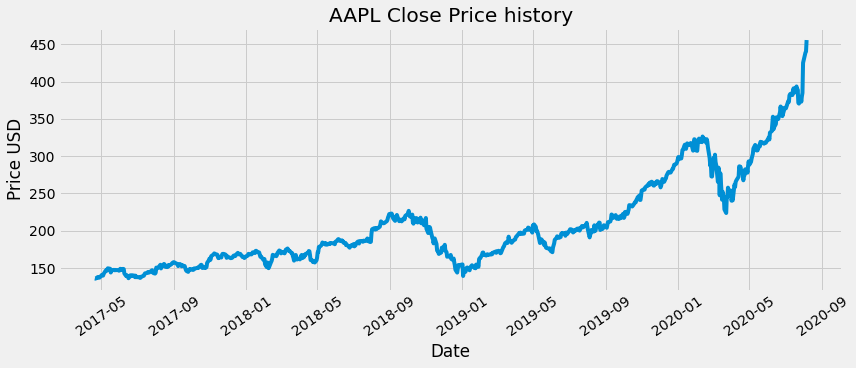

In [16]:
# Visualize stock price
plt.figure(figsize=(12.5,4.5))
plt.plot(df['Adj Close'],label = 'Close')
plt.xticks(rotation = 35) # to rotate the y axis labels
plt.title('AAPL Close Price history')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.show()

In [17]:
# Calculate the MACD and signal line indicators

# Short term exponential moving average(EMA)

ShortEMA = df.Close.ewm(span = 12, adjust = False).mean() # Short term last 12 periods

# Long term exponential movving average(EMA)

LongEMA = df.Close.ewm(span=26, adjust = False).mean()


In [18]:
# MACD line 

MACD  = ShortEMA - LongEMA

# Signal line 

signal = MACD.ewm(span=9, adjust=False).mean() # 9 perios moving avg of MACD line 

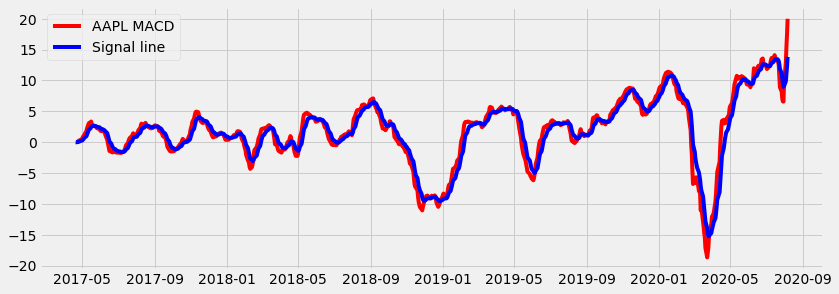

In [19]:
# Visualize

plt.figure(figsize=(12.5,4.5))
plt.plot(df.index, MACD, label = 'AAPL MACD', color = 'red')
plt.plot(df.index, signal, label = 'Signal line', color = 'blue')
plt.legend(loc = 'upper left')
plt.show()

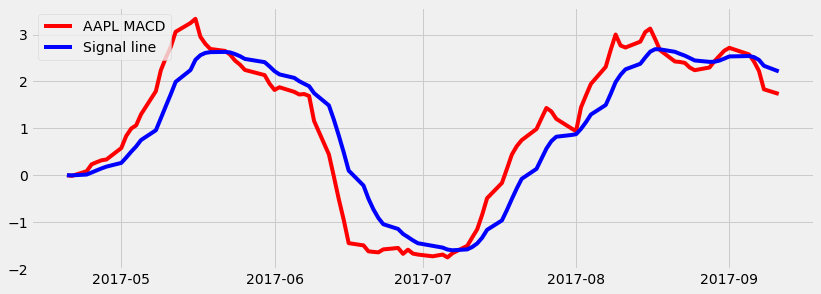

In [25]:
# Visualize

plt.figure(figsize=(12.5,4.5))
plt.plot(df.index[:100], MACD[:100], label = 'AAPL MACD', color = 'red')
plt.plot(df.index[:100], signal[:100], label = 'Signal line', color = 'blue')
plt.legend(loc = 'upper left')
plt.show()

In [26]:
df['MACD'] = MACD
df['Signal'] = signal
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal
Date,,,,,,,,
2017-04-20,142.919998,141.160004,141.220001,142.440002,23319600.0,135.966064,0.000000,0.000000
2017-04-21,142.679993,141.850006,142.440002,142.270004,17320900.0,135.803802,-0.013561,-0.002712
2017-04-24,143.949997,143.179993,143.500000,143.639999,17134300.0,137.111542,0.085256,0.014881
2017-04-25,144.899994,143.869995,143.910004,144.529999,18871500.0,137.961105,0.232702,0.058446
2017-04-26,144.600006,143.380005,144.470001,143.679993,20041200.0,137.149704,0.277764,0.102309
...,...,...,...,...,...,...,...,...
2020-07-31,425.660004,403.299988,411.540009,425.040009,93584200.0,425.040009,9.673075,9.104213
2020-08-03,446.549988,431.570007,432.799988,435.750000,77037800.0,435.750000,12.856050,9.854580
2020-08-04,443.160004,433.549988,436.529999,438.660004,43267900.0,438.660004,15.435464,10.970757


In [39]:
def buy_sell(signal):
  buy = []
  sell = []
  flag = -1 # Tells if price after crossing continues to rise or continues to decrease 
  #flag will change with momentum change

  for i in range(0,len(signal)):
    if signal['MACD'][i] > signal['Signal'][i]:
      sell.append(np.nan)
      if flag != 1:
        buy.append(signal['Close'][i])
        flag = 1
      else:
        buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal'][i]:
      buy.append(np.nan)
      if flag != 0:
        sell.append(signal['Close'][i])
        flag = 0
      else:
        sell.append(np.nan)
    else: 
      sell.append(np.nan)
      buy.append(np.nan)
  return (buy,sell)

In [40]:
a = buy_sell(df)
df['Buy Signal Price'] = a[0]
df['Sell Signal Price'] = a[1]

In [42]:
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal,Buy Signal Price,Sell Signal Price
Date,,,,,,,,,,
2017-04-20,142.919998,141.160004,141.220001,142.440002,23319600.0,135.966064,0.000000,0.000000,NaN,NaN
2017-04-21,142.679993,141.850006,142.440002,142.270004,17320900.0,135.803802,-0.013561,-0.002712,NaN,142.270004
2017-04-24,143.949997,143.179993,143.500000,143.639999,17134300.0,137.111542,0.085256,0.014881,143.639999,NaN
2017-04-25,144.899994,143.869995,143.910004,144.529999,18871500.0,137.961105,0.232702,0.058446,NaN,NaN
2017-04-26,144.600006,143.380005,144.470001,143.679993,20041200.0,137.149704,0.277764,0.102309,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-07-31,425.660004,403.299988,411.540009,425.040009,93584200.0,425.040009,9.673075,9.104213,425.040009,NaN
2020-08-03,446.549988,431.570007,432.799988,435.750000,77037800.0,435.750000,12.856050,9.854580,NaN,NaN
2020-08-04,443.160004,433.549988,436.529999,438.660004,43267900.0,438.660004,15.435464,10.970757,NaN,NaN


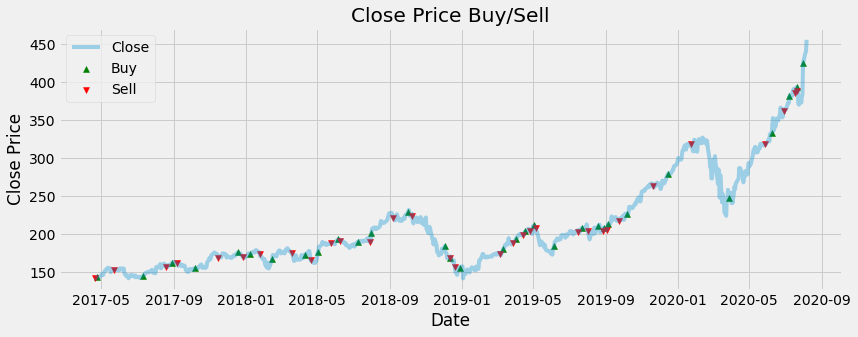

In [44]:
# Visualize

plt.figure(figsize=(12.5,4.5))
plt.scatter(df.index, df['Buy Signal Price'], color = 'green', label = 'Buy', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell Signal Price'], color = 'red' , label = 'Sell', marker = 'v', alpha = 1)
plt.plot(df['Close'], label = 'Close', alpha = 0.35)
plt.title('Close Price Buy/Sell')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc = 'upper left')
plt.show()